# Visualizing linear relationships

大多数数据集都有许多的特征(变量)，我们对数据的分析通常是找出
某个特征和其他特征之间的关系。例如我们可以在jointplot()画出两个变量的
联合分布来实现这一点。我们在这里会讨论更一般的线性回归的共性。

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set(color_codes=True)
tips = sns.load_dataset('tips')

### 线性回归模型的函数

regplot()和lmplot()函数是seaborn库通过回归来可视化线性关系的两个主要的函数。

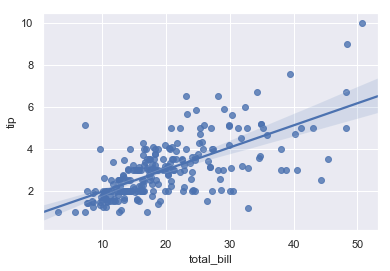

In [4]:
sns.regplot(x='total_bill', y='tip', data=tips);

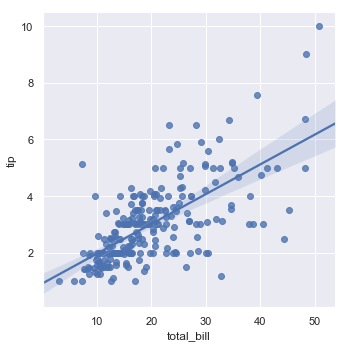

In [5]:
sns.lmplot(x='total_bill', y='tip', data=tips);

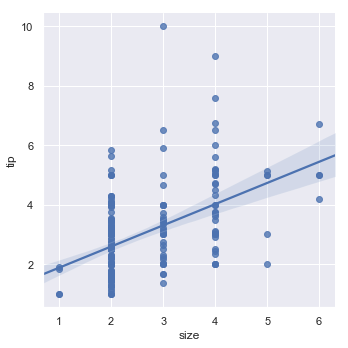

In [7]:
sns.lmplot(x='size', y='tip', data=tips);

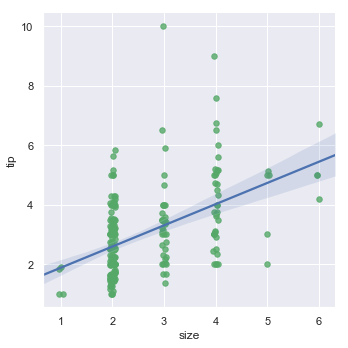

In [33]:
sns.lmplot(x='size', y='tip', data=tips, x_jitter=.05,
          scatter_kws={'s':30, 'color':'g'});

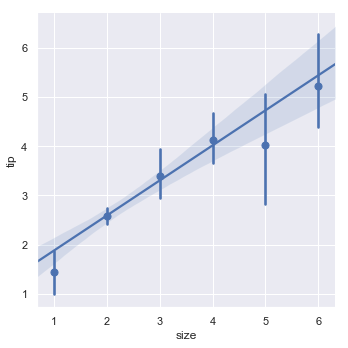

In [9]:
sns.lmplot(x='size', y='tip', data=tips, x_estimator=np.mean);

### 拟合不同类型的模型

上面的简单的线性回归模型的拟合非常简单，然而，有时候它对一些数据集却不那么
适用。

In [12]:
anscombe = sns.load_dataset('anscombe')
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


在第一类数据集中，线性回归是一个比较好的模型

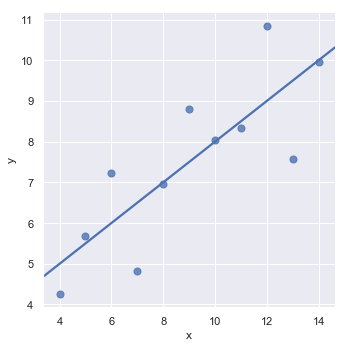

In [15]:
sns.lmplot(x='x', y='y', data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s" : 50});

然而在第二类数据集中，却不那么好了。

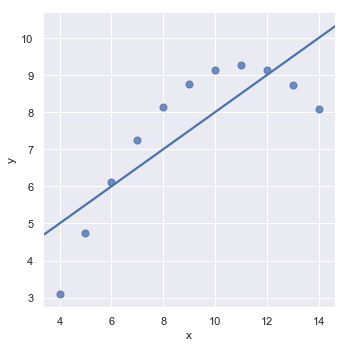

In [16]:
sns.lmplot(x='x', y='y', data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={'s': 50});

所以，对于这种非线性关系的数据集，我们可以使用多项式回归来拟合回归曲线

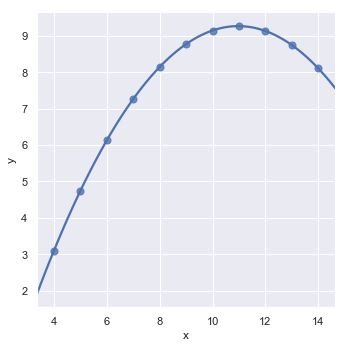

In [17]:
sns.lmplot(x='x', y='y', data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={'s': 50});

对于某些噪音值，它的存在会使我们拟合的回归曲线偏离

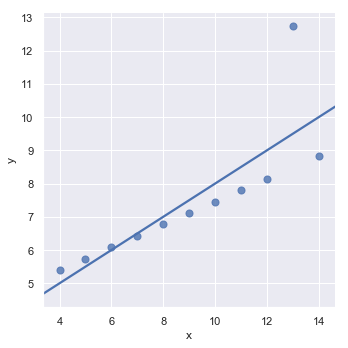

In [18]:
sns.lmplot(x='x', y='y', data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s":50});

我们可是设置robust=True来消除这种影响

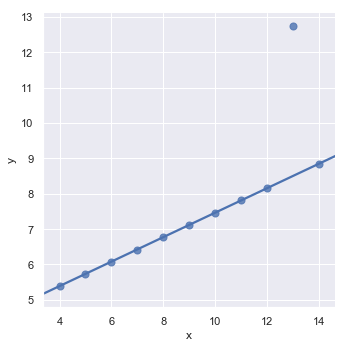

In [19]:
sns.lmplot(x='x', y='y', data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s":50});

当变量y取两个值时，简单线性回归拟合出曲线，但通常它表现的很糟糕

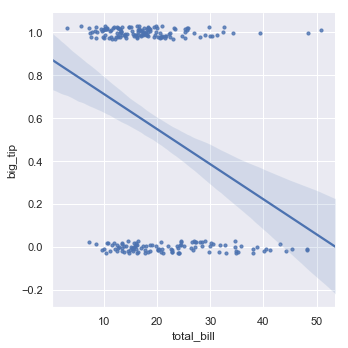

In [23]:
tips['big_tip'] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x='total_bill', y='big_tip', data=tips, y_jitter=.03,
           scatter_kws={"s":10});

所以，对于二分类问题，我们可以使用Logistic回归来解决

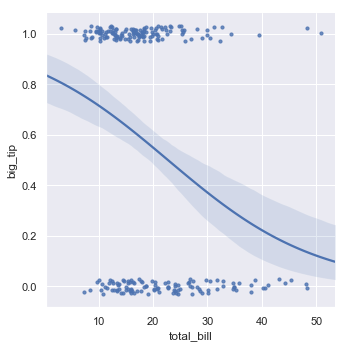

In [24]:
sns.lmplot(x='total_bill', y='big_tip', data=tips, y_jitter=.03,
           logistic=True, scatter_kws={"s":10});

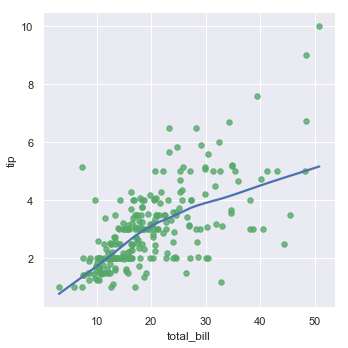

In [35]:
sns.lmplot(x='total_bill', y='tip', data=tips, 
           lowess=True, scatter_kws={'s':30, 'color':'g'});

residplot()可以帮助我们看出是否数据集适用于简单线性回归

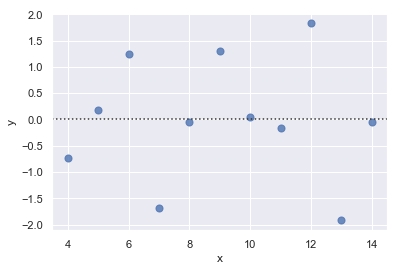

In [41]:
sns.residplot(x='x', y='y', data=anscombe.query("dataset == 'I'"),
              scatter_kws={"s": 50});

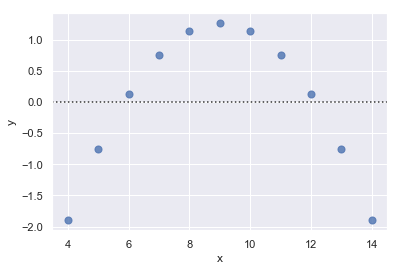

In [40]:
sns.residplot(x='x', y='y', data=anscombe.query("dataset == 'II'"),
              scatter_kws={"s": 50});

## Conditioning on other variables

这两个变量之间的关系如何作为第三变量的函数而变化？

regplot()只能体现单一的关系；而lmplot()可以和FacetGrid()结合起来,
提供一个简单的界面来显示线性回归“Faced”图，允许您探索与多达三个附加分类变量的交互。

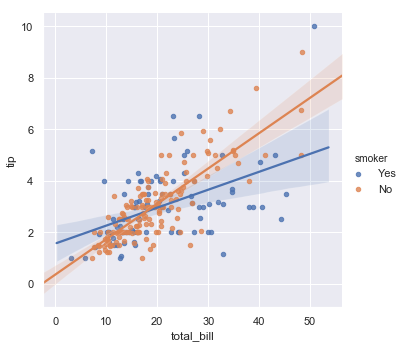

In [44]:
sns.lmplot(x='total_bill', y='tip', hue='smoker', data=tips,
           scatter_kws={"s":20});

对于每一类使用不同的标记

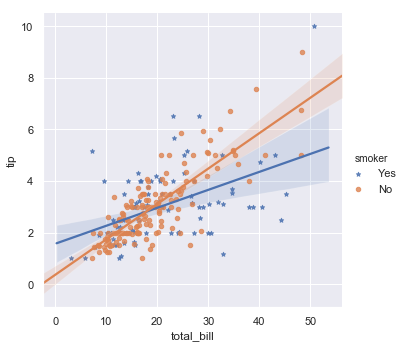

In [48]:
sns.lmplot(x='total_bill', y='tip', hue='smoker', data=tips,
           markers=["*", "o"], scatter_kws={"s":20});

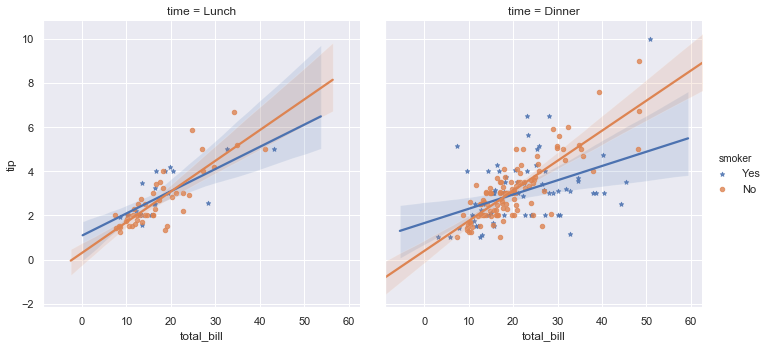

In [49]:
sns.lmplot(x='total_bill', y='tip', hue='smoker', col='time', 
           data=tips,markers=["*", "o"], scatter_kws={"s":20});

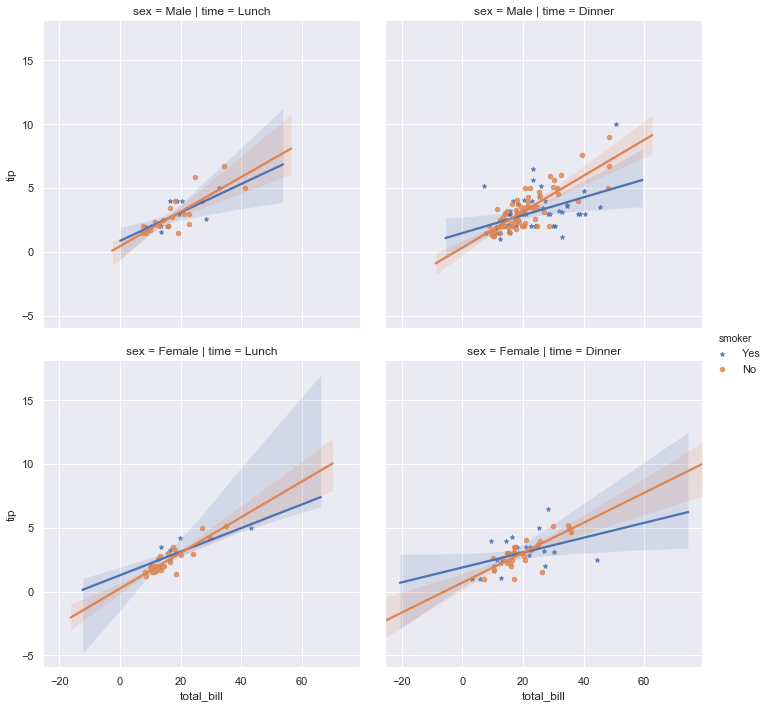

In [50]:
sns.lmplot(x='total_bill', y='tip', hue='smoker', 
           col='time', row='sex',data=tips,markers=["*", "o"], 
           scatter_kws={"s":20});

## Controlling the size and shape of the plot

在relplot()中，我们可以通过matplot.pyplot设置图的大小

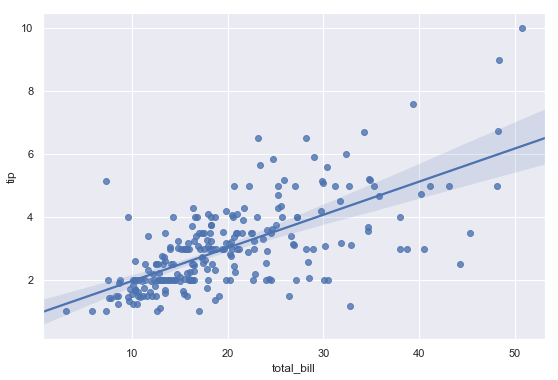

In [52]:
f, ax = plt.subplots(figsize=(9, 6)) # (宽，高)
sns.regplot(x='total_bill', y='tip', data=tips, ax=ax);

然而在lmplot()中，我们可以直接使用参数控制

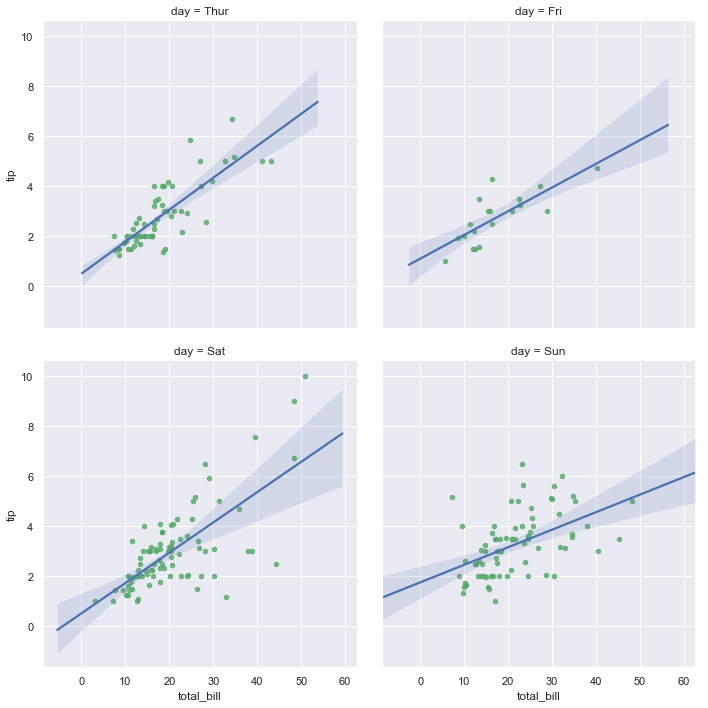

In [56]:
sns.lmplot(x='total_bill', y='tip', col='day', 
            col_wrap=2, height=5, data=tips, scatter_kws={"s":20, "color":'g'} );

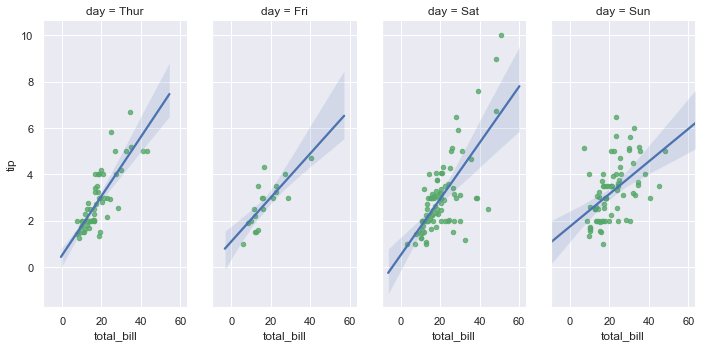

In [57]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           aspect=.5, scatter_kws={"s":20, "color":'g'});

## Plotting a regression in other contexts

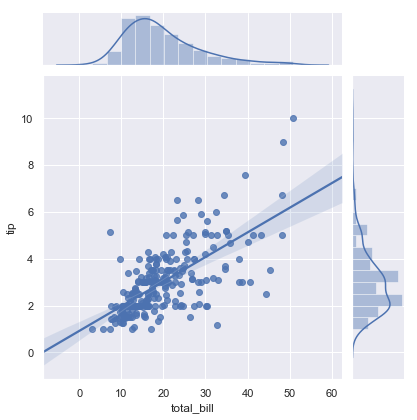

In [59]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg');

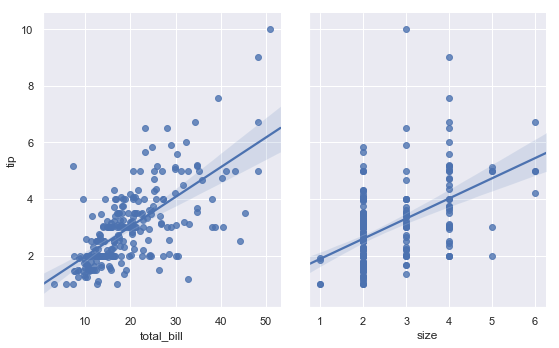

In [67]:
sns.pairplot(tips, x_vars=['total_bill', 'size'], y_vars=["tip"],
             height=5, aspect=.8, kind='reg');

In [66]:
#sns.pairplot(iris, hue='species', markers=['o', '*', 'x']);

In [65]:
#iris = sns.load_dataset('iris')
#sns.pairplot(iris, hue='species', palette='husl');

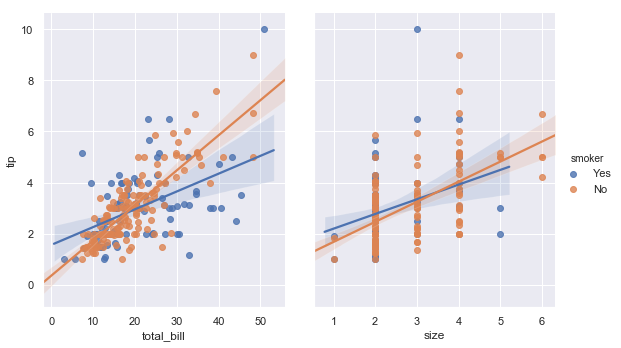

In [68]:
sns.pairplot(tips, x_vars=['total_bill', 'size'], y_vars=["tip"],
             hue='smoker', height=5, aspect=.8, kind='reg');